In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##PART -A

In [ ]:
STUDENT_ID = "PES2UG23CS164"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [ ]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS164
Polynomial Type: CUBIC + INVERSE: y = 2.05x³ + -0.54x² + 3.83x + 11.30 + 122.9/x
Noise Level: ε ~ N(0, 2.21)
Architecture: Input(1) → Hidden(64) → Hidden(64) → Output(1)
Learning Rate: 0.001
Architecture Type: Balanced Architecture


# DATASET GENERATION - DO NOT MODIFY

In [ ]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [ ]:
def relu(x):
    # TODO: Implement ReLU
    return np.maximum(0, x)

def relu_derivative(x):
    # TODO: Implement derivative of ReLU
    return (x > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

In [ ]:
def mse_loss(y_true, y_pred):
    # TODO: Implement Mean Squared Error
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    # TODO: Implement derivative of MSE Loss
    return (2 * (y_pred - y_true)) / y_true.shape[0]

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

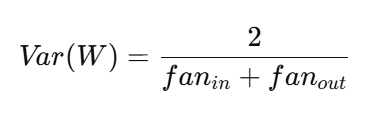


##Two common forms:  

#**Normal distribution:**  
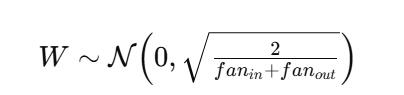

#**Uniform distribution:**  
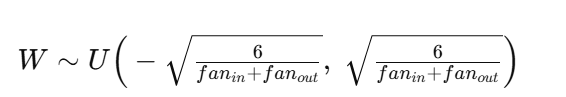

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [ ]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    TODO: IMPLEMENT XAVIER WEIGHT INITIALIZATION
    """
    np.random.seed(assignment["student_seed"])

    # TODO: Calculate Xavier standard deviation for each layer
    xavier_std_W1 = np.sqrt(2.0 / (input_dim + hidden1))
    xavier_std_W2 = np.sqrt(2.0 / (hidden1 + hidden2))
    xavier_std_W3 = np.sqrt(2.0 / (hidden2 + output_dim))

    # TODO: Initialize W1 (input to first hidden layer)
    W1 = np.random.randn(input_dim, hidden1) * xavier_std_W1
    b1 = np.zeros((1, hidden1))

    # TODO: Initialize W2 (first hidden to second hidden layer)
    W2 = np.random.randn(hidden1, hidden2) * xavier_std_W2
    b2 = np.zeros((1, hidden2))

    # TODO: Initialize W3 (second hidden to output layer)
    W3 = np.random.randn(hidden2, output_dim) * xavier_std_W3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [ ]:
def forward_pass(X, weights, biases):
    # TODO: Implement forward propagation
    z1 = np.dot(X, weights["W1"]) + biases["b1"]
    a1 = relu(z1)

    z2 = np.dot(a1, weights["W2"]) + biases["b2"]
    a2 = relu(z2)

    z3 = np.dot(a2, weights["W3"]) + biases["b3"]
    output = z3   # linear output for regression

    cache = {"X": X, "z1": z1, "a1": a1,
             "z2": z2, "a2": a2,
             "z3": z3, "output": output}
    return output, cache

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [ ]:
def backpropagation(y_true, cache, weights):
    # TODO: Implement backpropagation
    m = y_true.shape[0]

    # unpack cache
    X, z1, a1, z2, a2, output = cache["X"], cache["z1"], cache["a1"], cache["z2"], cache["a2"], cache["output"]

    # Output layer
    d_output = mse_loss_derivative(y_true, output)
    dW3 = np.dot(a2.T, d_output) / m
    db3 = np.mean(d_output, axis=0, keepdims=True)

    # Hidden layer 2
    da2 = np.dot(d_output, weights["W3"].T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.mean(dz2, axis=0, keepdims=True)

    # Hidden layer 1
    da1 = np.dot(dz2, weights["W2"].T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.mean(dz1, axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}
    return grads

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [ ]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs, patience):
    """
    Trains the neural network.

    Args:
        X_train (np.ndarray): Scaled training input data.
        Y_train (np.ndarray): Scaled training target data.
        X_test (np.ndarray): Scaled test input data.
        Y_test (np.ndarray): Scaled test target data.
        epochs (int): Maximum number of training epochs.
        patience (int): Number of epochs to wait for improvement before early stopping.

    Returns:
        tuple: A tuple containing:
            - best_weights (tuple): Weights and biases of the best performing model.
            - train_losses (list): List of training losses per epoch.
            - test_losses (list): List of test losses per epoch.
    """
    input_dim = X_train.shape[1]
    output_dim = Y_train.shape[1]

    # Initialize weights and biases
    W1, b1, W2, b2, W3, b3 = xavier_initialization(input_dim, hidden1, hidden2, output_dim)
    weights = {"W1": W1, "W2": W2, "W3": W3}
    biases = {"b1": b1, "b2": b2, "b3": b3}

    train_losses = []
    test_losses = []
    best_test_loss = float('inf')
    epochs_no_improve = 0
    best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())


    print("Starting training...")
    print(f"Architecture: {input_dim} → {hidden1} → {hidden2} → {output_dim}")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        # Forward pass
        Y_train_pred, cache = forward_pass(X_train, weights, biases)

        # Calculate training loss
        train_loss = mse_loss(Y_train, Y_train_pred)
        train_losses.append(train_loss)

        # Backpropagation
        grads = backpropagation(Y_train, cache, weights)

        # Update weights and biases
        weights["W1"] -= learning_rate * grads["dW1"]
        biases["b1"] -= learning_rate * grads["db1"]
        weights["W2"] -= learning_rate * grads["dW2"]
        biases["b2"] -= learning_rate * grads["db2"]
        weights["W3"] -= learning_rate * grads["dW3"]
        biases["b3"] -= learning_rate * grads["db3"]


        # Evaluate on test set
        Y_test_pred, _ = forward_pass(X_test, weights, biases)
        test_loss = mse_loss(Y_test, Y_test_pred)
        test_losses.append(test_loss)

        # Print progress
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch + 1: >4}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # Early stopping
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            epochs_no_improve = 0
            best_weights = (weights["W1"].copy(), biases["b1"].copy(),
                            weights["W2"].copy(), biases["b2"].copy(),
                            weights["W3"].copy(), biases["b3"].copy())
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break

    print("-" * 50)
    print("Training finished.")
    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [ ]:
print("Training Neural Network with your specific configuration...")
best_weights_biases, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch   20: Train Loss = 1.157722, Test Loss = 1.169942
Epoch   40: Train Loss = 1.157721, Test Loss = 1.169941
Epoch   60: Train Loss = 1.157720, Test Loss = 1.169940
Epoch   80: Train Loss = 1.157719, Test Loss = 1.169939
Epoch  100: Train Loss = 1.157718, Test Loss = 1.169939
Epoch  120: Train Loss = 1.157717, Test Loss = 1.169938
Epoch  140: Train Loss = 1.157716, Test Loss = 1.169937
Epoch  160: Train Loss = 1.157715, Test Loss = 1.169936
Epoch  180: Train Loss = 1.157715, Test Loss = 1.169935
Epoch  200: Train Loss = 1.157714, Test Loss = 1.169934
Epoch  220: Train Loss = 1.157713, Test Loss = 1.169933
Epoch  240: Train Loss = 1.157712, Test Loss = 1.169932
Epoch  260: Train Loss = 1.157711, Test Loss = 1.169931
Epoch  280: Train Loss = 1.157710, Test Loss

# RESULTS VISUALIZATION

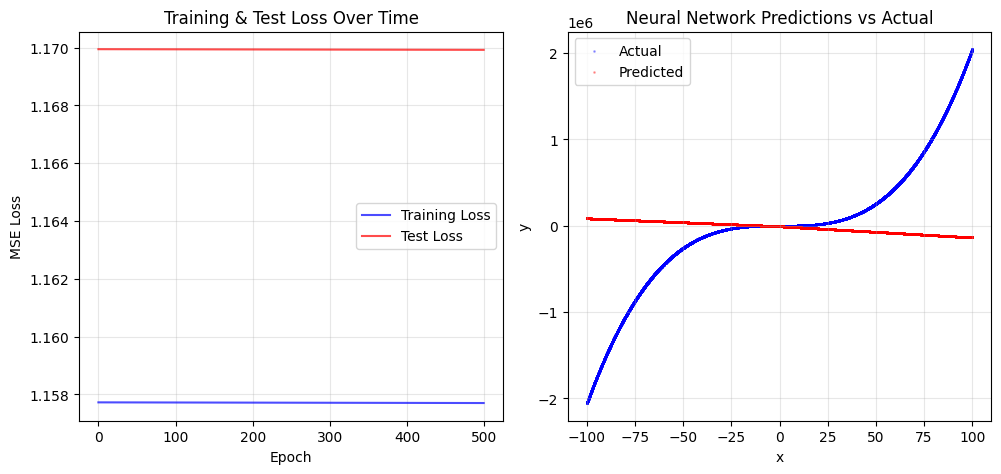

In [ ]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
# Unpack the tuple of weights and biases returned from training
W1, b1, W2, b2, W3, b3 = best_weights_biases
weights_dict = {"W1": W1, "W2": W2, "W3": W3}
biases_dict = {"b1": b1, "b2": b2, "b3": b3}
Y_pred_scaled, _ = forward_pass(X_test_scaled, weights_dict, biases_dict)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual - THIS IS YOUR SCATTER PLOT
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [ ]:
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

# Unpack the tuple of weights and biases returned from training
W1, b1, W2, b2, W3, b3 = best_weights_biases
weights_dict = {"W1": W1, "W2": W2, "W3": W3}
biases_dict = {"b1": b1, "b2": b2, "b3": b3}
y_pred_scaled, _ = forward_pass(x_new_scaled, weights_dict, biases_dict)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")


PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: -124,065.72
Ground Truth (formula):    1,500,318.43
Absolute Error:            1,624,384.15
Relative Error:            108.269%


# PERFORMANCE METRICS

In [ ]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 1.157700
Final Test Loss:     1.169920
R² Score:           -0.1584
Total Epochs Run:   500


PART B

ASSIGNMENT FOR STUDENT ID: PES2UG23CS164
Polynomial Type: CUBIC + INVERSE: y = 2.05x³ + -0.54x² + 3.83x + 11.30 + 122.9/x
Noise Level: ε ~ N(0, 2.21)
Architecture: Input(1) → Hidden(64) → Hidden(64) → Output(1)
Learning Rate: 0.001
Architecture Type: Balanced Architecture
Training samples: 80,000
Test samples: 20,000

RUNNING BASELINE
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.001
Activation: relu
Batch Size: 80000
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch   50: Train Loss = 1.157721, Test Loss = 1.169941
Epoch  100: Train Loss = 1.157718, Test Loss = 1.169939
Epoch  150: Train Loss = 1.157716, Test Loss = 1.169936
Epoch  200: Train Loss = 1.157714, Test Loss = 1.169934
Epoch  250: Train Loss = 1.157711, Test Loss = 1.169931
Epoch  300: Train Loss = 1.157709, Test Loss = 1.169929
Epoch  350: Train Loss = 1.157707, Test Loss = 1.169927
Epoch  400: Train Loss = 1.157704, Test Loss = 1.169924
Epoch  450: 

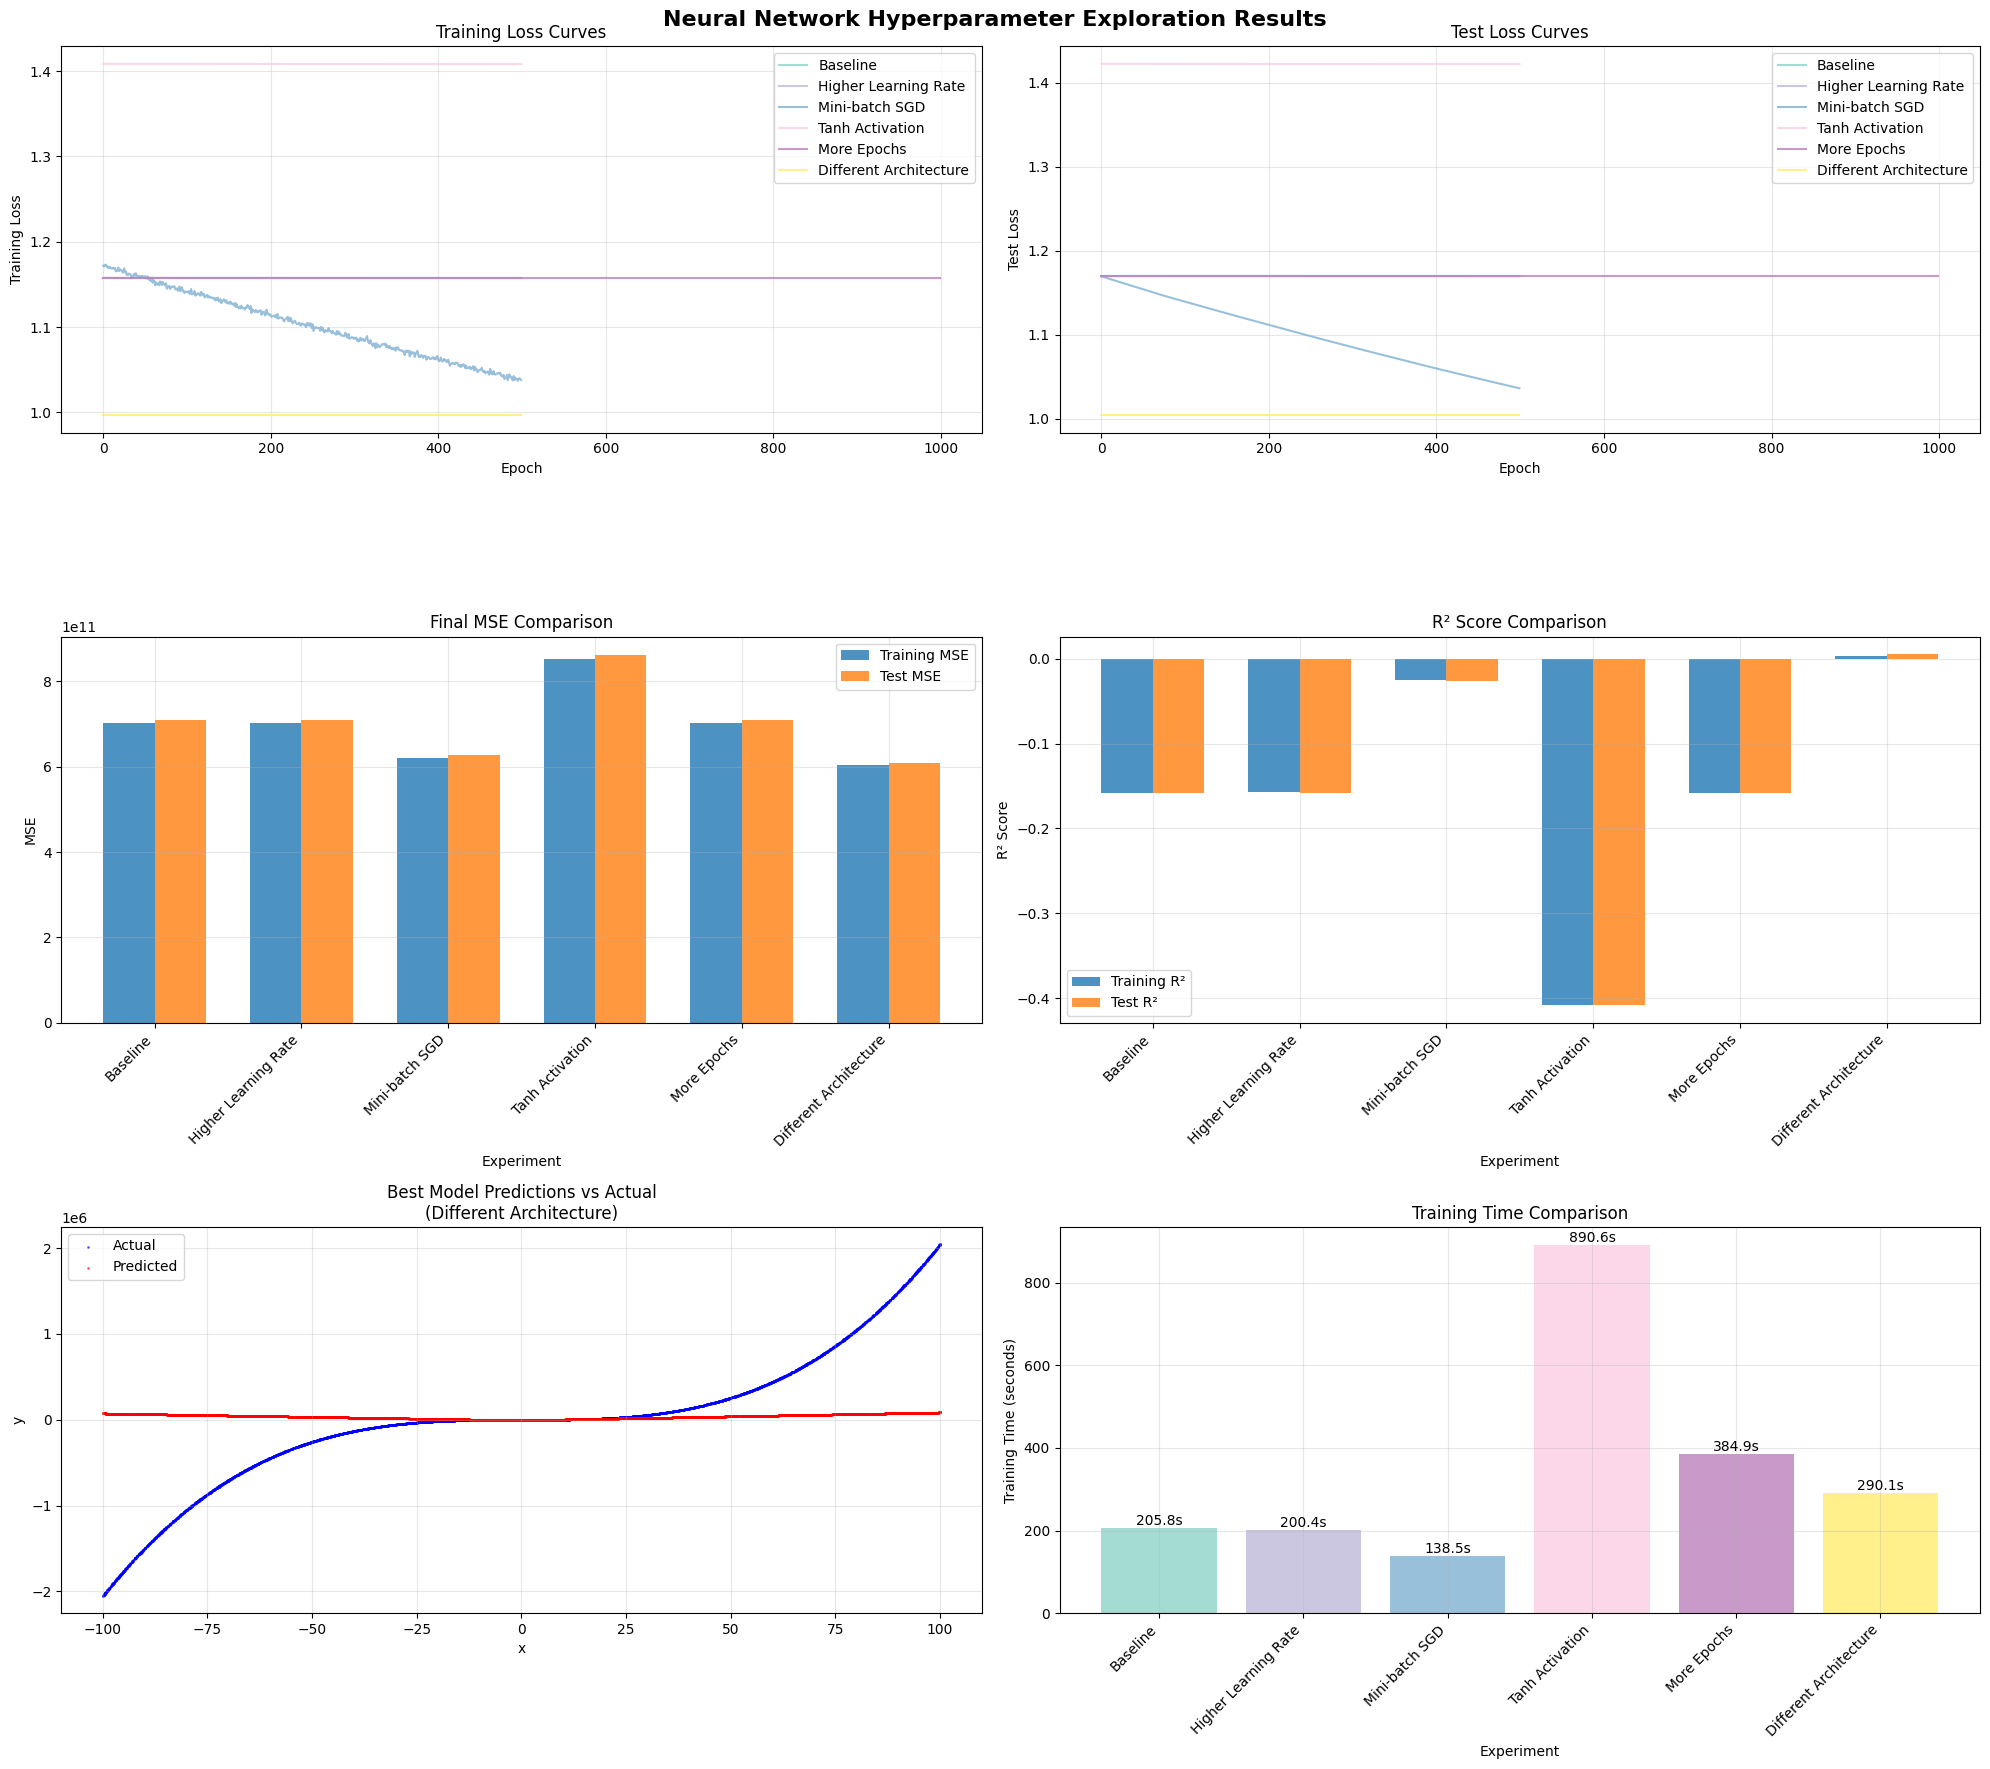


COMPREHENSIVE EXPERIMENTAL RESULTS TABLE
            Experiment Learning Rate Batch Size  Epochs  Epochs Run Activation Architecture         Train MSE          Test MSE Train R² Test R² Training Time
              Baseline        0.0010       Full     500         500       Relu        64-64 701078092724.1239 708478378191.6260  -0.1577 -0.1584        205.8s
  Higher Learning Rate        0.0050       Full     500         500       Relu        64-64 701021739661.2382 708421749725.2666  -0.1576 -0.1583        200.4s
        Mini-batch SGD        0.0010       1024     500         500       Relu        64-64 620539433246.1167 627667201901.7705  -0.0247 -0.0262        138.5s
       Tanh Activation        0.0010       Full     500         500       Tanh        64-64 852849986088.7721 861348920620.9764  -0.4083 -0.4083        890.6s
           More Epochs        0.0010       Full    1000        1000       Relu        64-64 701064003776.4640 708464220392.0457  -0.1577 -0.1583        384.9s
Diff

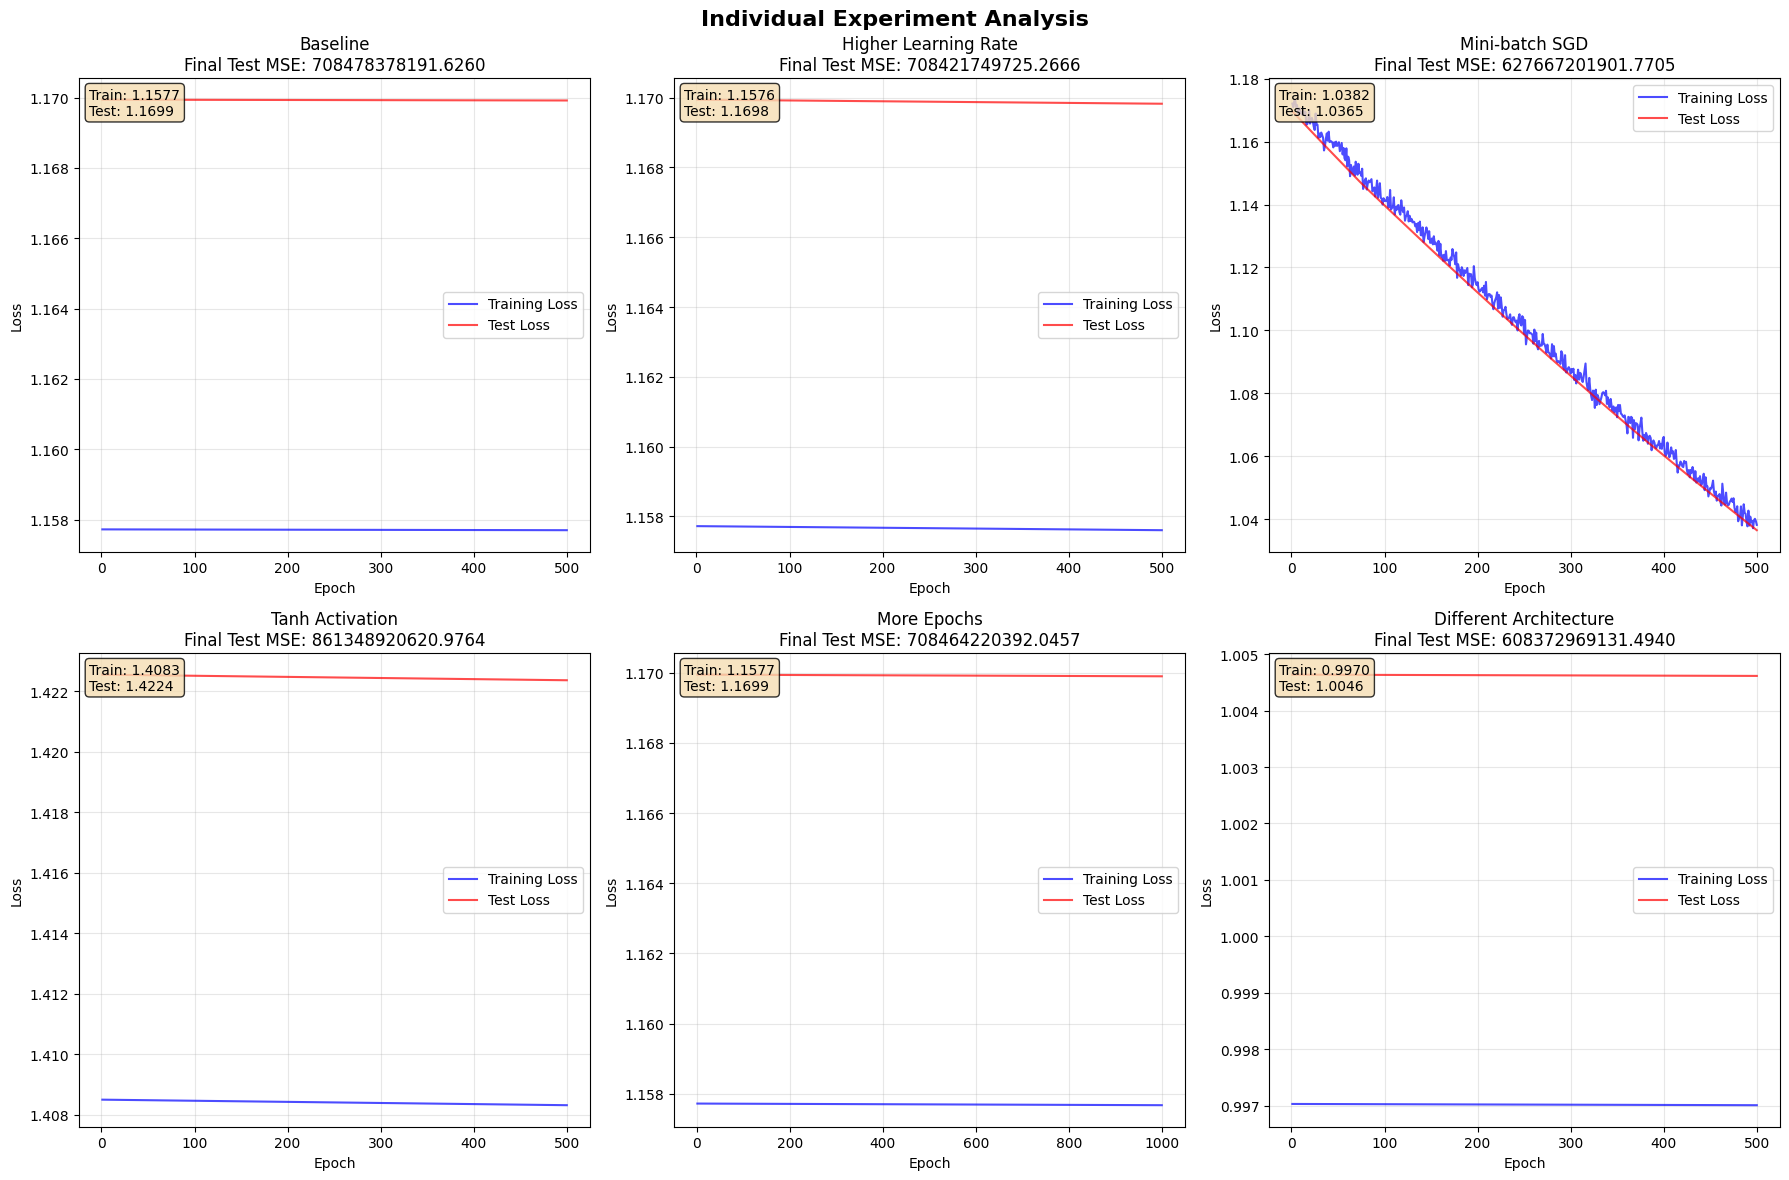


KEY INSIGHTS AND RECOMMENDATIONS

KEY FINDINGS:
  ✓ Higher learning rate improved performance - consider further tuning
  ✓ Mini-batch training improved performance and likely convergence stability
  ⚠ ReLU activation performed better than Tanh for this regression task
  ✓ Larger architecture improved performance - network had sufficient capacity
  ⚖ Trade-off: Best model takes 2.1x longer but is 1.0x better

RECOMMENDATIONS FOR FUTURE EXPERIMENTS:
  • Best configuration: Different Architecture
  • Consider testing learning rates around 0.0010
  • Activation function: Relu showed good results
  • R² score is low (0.005) - consider:
    - More complex architectures
    - Feature engineering
    - Different activation functions
    - Regularization techniques

Results saved to 'experiment_results.csv'

EXPERIMENT SUMMARY FOR REPORT:
Dataset: CUBIC + INVERSE: y = 2.05x³ + -0.54x² + 3.83x + 11.30 + 122.9/x
Total Samples: 100,000
Best Model: Different Architecture
Best Performance: MSE = 6

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ========================================================================================
# PART A - BASELINE IMPLEMENTATION (Same as provided)
# ========================================================================================

STUDENT_ID = "PES2UG23CS164"

def get_student_assignment(student_id):
    """Generate unique polynomial TYPE and architecture based on student ID"""
    last_three = int(student_id[-3:])
    poly_type = last_three % 5
    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)

    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)

    noise_std = np.random.uniform(1.5, 2.5)

    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)

# Generate dataset
np.random.seed(assignment["student_seed"])
n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)

if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)
elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)
else:
    a, b, c, d, inv_coeff = coefficients
    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

# ========================================================================================
# ACTIVATION FUNCTIONS AND UTILITIES
# ========================================================================================

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def tanh_activation(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return (2 * (y_pred - y_true)) / y_true.shape[0]

def xavier_initialization(input_dim, hidden1, hidden2, output_dim, seed=None):
    if seed:
        np.random.seed(seed)

    xavier_std_W1 = np.sqrt(2.0 / (input_dim + hidden1))
    xavier_std_W2 = np.sqrt(2.0 / (hidden1 + hidden2))
    xavier_std_W3 = np.sqrt(2.0 / (hidden2 + output_dim))

    W1 = np.random.randn(input_dim, hidden1) * xavier_std_W1
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * xavier_std_W2
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * xavier_std_W3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# ========================================================================================
# IMPROVED NEURAL NETWORK WITH DIFFERENT ACTIVATION FUNCTIONS
# ========================================================================================

class NeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, output_dim, activation='relu', learning_rate=0.001, seed=None):
        self.input_dim = input_dim
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.activation = activation

        # Initialize weights
        W1, b1, W2, b2, W3, b3 = xavier_initialization(input_dim, hidden1, hidden2, output_dim, seed)
        self.weights = {"W1": W1, "W2": W2, "W3": W3}
        self.biases = {"b1": b1, "b2": b2, "b3": b3}

        # Set activation functions
        if activation == 'relu':
            self.activation_func = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation_func = tanh_activation
            self.activation_derivative = tanh_derivative
        elif activation == 'sigmoid':
            self.activation_func = sigmoid
            self.activation_derivative = sigmoid_derivative

    def forward_pass(self, X):
        z1 = np.dot(X, self.weights["W1"]) + self.biases["b1"]
        a1 = self.activation_func(z1)

        z2 = np.dot(a1, self.weights["W2"]) + self.biases["b2"]
        a2 = self.activation_func(z2)

        z3 = np.dot(a2, self.weights["W3"]) + self.biases["b3"]
        output = z3  # linear output for regression

        cache = {"X": X, "z1": z1, "a1": a1, "z2": z2, "a2": a2, "z3": z3, "output": output}
        return output, cache

    def backpropagation(self, y_true, cache):
        m = y_true.shape[0]

        X, z1, a1, z2, a2, output = cache["X"], cache["z1"], cache["a1"], cache["z2"], cache["a2"], cache["output"]

        # Output layer
        d_output = mse_loss_derivative(y_true, output)
        dW3 = np.dot(a2.T, d_output) / m
        db3 = np.mean(d_output, axis=0, keepdims=True)

        # Hidden layer 2
        da2 = np.dot(d_output, self.weights["W3"].T)
        dz2 = da2 * self.activation_derivative(z2)
        dW2 = np.dot(a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)

        # Hidden layer 1
        da1 = np.dot(dz2, self.weights["W2"].T)
        dz1 = da1 * self.activation_derivative(z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)

        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
        return grads

    def update_parameters(self, grads):
        self.weights["W1"] -= self.learning_rate * grads["dW1"]
        self.biases["b1"] -= self.learning_rate * grads["db1"]
        self.weights["W2"] -= self.learning_rate * grads["dW2"]
        self.biases["b2"] -= self.learning_rate * grads["db2"]
        self.weights["W3"] -= self.learning_rate * grads["dW3"]
        self.biases["b3"] -= self.learning_rate * grads["db3"]

    def train(self, X_train, Y_train, X_test, Y_test, epochs=500, patience=10, batch_size=None, verbose=True):
        train_losses = []
        test_losses = []
        best_test_loss = float('inf')
        epochs_no_improve = 0
        best_weights = None
        best_biases = None

        # Use mini-batch if batch_size is specified
        if batch_size is None:
            batch_size = X_train.shape[0]  # Full batch

        n_batches = max(1, X_train.shape[0] // batch_size)

        if verbose:
            print("Starting training...")
            print(f"Architecture: {self.input_dim} → {self.hidden1} → {self.hidden2} → {self.output_dim}")
            print(f"Learning Rate: {self.learning_rate}")
            print(f"Activation: {self.activation}")
            print(f"Batch Size: {batch_size}")
            print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
            print("-" * 50)

        for epoch in range(epochs):
            # Shuffle data for each epoch
            indices = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[indices]
            Y_train_shuffled = Y_train[indices]

            epoch_train_loss = 0

            # Mini-batch training
            for i in range(0, X_train.shape[0], batch_size):
                end_idx = min(i + batch_size, X_train.shape[0])
                X_batch = X_train_shuffled[i:end_idx]
                Y_batch = Y_train_shuffled[i:end_idx]

                # Forward pass
                Y_pred, cache = self.forward_pass(X_batch)
                batch_loss = mse_loss(Y_batch, Y_pred)
                epoch_train_loss += batch_loss

                # Backpropagation and update
                grads = self.backpropagation(Y_batch, cache)
                self.update_parameters(grads)

            # Calculate average training loss for the epoch
            avg_train_loss = epoch_train_loss / n_batches
            train_losses.append(avg_train_loss)

            # Evaluate on test set
            Y_test_pred, _ = self.forward_pass(X_test)
            test_loss = mse_loss(Y_test, Y_test_pred)
            test_losses.append(test_loss)

            # Print progress
            if verbose and (epoch + 1) % 50 == 0:
                print(f"Epoch {epoch + 1: >4}: Train Loss = {avg_train_loss:.6f}, Test Loss = {test_loss:.6f}")

            # Early stopping
            if test_loss < best_test_loss:
                best_test_loss = test_loss
                epochs_no_improve = 0
                best_weights = {k: v.copy() for k, v in self.weights.items()}
                best_biases = {k: v.copy() for k, v in self.biases.items()}
            else:
                epochs_no_improve += 1
                if epochs_no_improve == patience:
                    if verbose:
                        print(f"\nEarly stopping at epoch {epoch + 1}")
                    break

        # Restore best weights
        if best_weights is not None:
            self.weights = best_weights
            self.biases = best_biases

        if verbose:
            print("-" * 50)
            print("Training finished.")

        return train_losses, test_losses

    def predict(self, X):
        output, _ = self.forward_pass(X)
        return output

# ========================================================================================
# EXPERIMENT CONFIGURATION
# ========================================================================================

def calculate_metrics(y_true, y_pred):
    """Calculate various metrics"""
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))

    # R² Score
    y_mean = np.mean(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    return mse, mae, r2

def run_experiment(config, X_train, Y_train, X_test, Y_test, scaler_Y, experiment_name="Experiment"):
    """Run a single experiment with given configuration"""
    print(f"\n{'='*60}")
    print(f"RUNNING {experiment_name.upper()}")
    print(f"{'='*60}")

    start_time = time.time()

    # Create and train model
    model = NeuralNetwork(
        input_dim=1,
        hidden1=config.get('hidden1', hidden1),
        hidden2=config.get('hidden2', hidden2),
        output_dim=1,
        activation=config.get('activation', 'relu'),
        learning_rate=config.get('learning_rate', learning_rate),
        seed=assignment["student_seed"]
    )

    train_losses, test_losses = model.train(
        X_train, Y_train, X_test, Y_test,
        epochs=config.get('epochs', 500),
        patience=config.get('patience', 10),
        batch_size=config.get('batch_size', None),
        verbose=True
    )

    training_time = time.time() - start_time

    # Get predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Calculate metrics on original scale
    Y_train_orig = scaler_Y.inverse_transform(Y_train)
    Y_test_orig = scaler_Y.inverse_transform(Y_test)
    Y_train_pred_orig = scaler_Y.inverse_transform(Y_train_pred)
    Y_test_pred_orig = scaler_Y.inverse_transform(Y_test_pred)

    train_mse, train_mae, train_r2 = calculate_metrics(Y_train_orig, Y_train_pred_orig)
    test_mse, test_mae, test_r2 = calculate_metrics(Y_test_orig, Y_test_pred_orig)

    return {
        'model': model,
        'train_losses': train_losses,
        'test_losses': test_losses,
        'Y_train_pred_orig': Y_train_pred_orig,
        'Y_test_pred_orig': Y_test_pred_orig,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'training_time': training_time,
        'epochs_run': len(train_losses),
        'config': config
    }

# ========================================================================================
# PART B - HYPERPARAMETER EXPLORATION
# ========================================================================================

# Define experiments
experiments = {
    'Baseline': {
        'learning_rate': learning_rate,
        'batch_size': None,  # Full batch
        'epochs': 500,
        'patience': 10,
        'activation': 'relu',
        'hidden1': hidden1,
        'hidden2': hidden2
    },
    'Higher Learning Rate': {
        'learning_rate': learning_rate * 5,  # 5x higher
        'batch_size': None,
        'epochs': 500,
        'patience': 10,
        'activation': 'relu',
        'hidden1': hidden1,
        'hidden2': hidden2
    },
    'Mini-batch SGD': {
        'learning_rate': learning_rate,
        'batch_size': 1024,  # Mini-batch
        'epochs': 500,
        'patience': 10,
        'activation': 'relu',
        'hidden1': hidden1,
        'hidden2': hidden2
    },
    'Tanh Activation': {
        'learning_rate': learning_rate,
        'batch_size': None,
        'epochs': 500,
        'patience': 10,
        'activation': 'tanh',
        'hidden1': hidden1,
        'hidden2': hidden2
    },
    'More Epochs': {
        'learning_rate': learning_rate,
        'batch_size': None,
        'epochs': 1000,  # 2x more epochs
        'patience': 20,
        'activation': 'relu',
        'hidden1': hidden1,
        'hidden2': hidden2
    },
    'Different Architecture': {
        'learning_rate': learning_rate,
        'batch_size': None,
        'epochs': 500,
        'patience': 10,
        'activation': 'relu',
        'hidden1': 128,  # Larger network
        'hidden2': 64
    }
}

# Run all experiments
results = {}
for exp_name, config in experiments.items():
    results[exp_name] = run_experiment(
        config, X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
        scaler_Y, exp_name
    )

# ========================================================================================
# RESULTS VISUALIZATION AND TABLE
# ========================================================================================

# Create comprehensive plots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Neural Network Hyperparameter Exploration Results', fontsize=16, fontweight='bold')

# Original data for reference
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)

# Colors for different experiments
colors = plt.cm.Set3(np.linspace(0, 1, len(experiments)))

# Plot 1: Training Loss Curves
ax1 = axes[0, 0]
for i, (exp_name, result) in enumerate(results.items()):
    ax1.plot(result['train_losses'], label=f'{exp_name}', color=colors[i], alpha=0.8)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Test Loss Curves
ax2 = axes[0, 1]
for i, (exp_name, result) in enumerate(results.items()):
    ax2.plot(result['test_losses'], label=f'{exp_name}', color=colors[i], alpha=0.8)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Test Loss')
ax2.set_title('Test Loss Curves')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Final MSE Comparison
ax3 = axes[1, 0]
exp_names = list(results.keys())
train_mses = [results[name]['train_mse'] for name in exp_names]
test_mses = [results[name]['test_mse'] for name in exp_names]

x_pos = np.arange(len(exp_names))
width = 0.35

ax3.bar(x_pos - width/2, train_mses, width, label='Training MSE', alpha=0.8)
ax3.bar(x_pos + width/2, test_mses, width, label='Test MSE', alpha=0.8)
ax3.set_xlabel('Experiment')
ax3.set_ylabel('MSE')
ax3.set_title('Final MSE Comparison')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(exp_names, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: R² Score Comparison
ax4 = axes[1, 1]
train_r2s = [results[name]['train_r2'] for name in exp_names]
test_r2s = [results[name]['test_r2'] for name in exp_names]

ax4.bar(x_pos - width/2, train_r2s, width, label='Training R²', alpha=0.8)
ax4.bar(x_pos + width/2, test_r2s, width, label='Test R²', alpha=0.8)
ax4.set_xlabel('Experiment')
ax4.set_ylabel('R² Score')
ax4.set_title('R² Score Comparison')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(exp_names, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Best Experiment Predictions vs Actual
best_exp_name = min(results.keys(), key=lambda x: results[x]['test_mse'])
best_result = results[best_exp_name]

ax5 = axes[2, 0]
# Sample points for clearer visualization
sample_indices = np.random.choice(len(X_test_orig), min(5000, len(X_test_orig)), replace=False)
X_sample = X_test_orig[sample_indices]
Y_sample = Y_test_orig[sample_indices]
Y_pred_sample = best_result['Y_test_pred_orig'][sample_indices]

ax5.scatter(X_sample, Y_sample, s=1, alpha=0.5, label='Actual', color='blue')
ax5.scatter(X_sample, Y_pred_sample, s=1, alpha=0.5, label='Predicted', color='red')
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_title(f'Best Model Predictions vs Actual\n({best_exp_name})')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Training Time Comparison
ax6 = axes[2, 1]
training_times = [results[name]['training_time'] for name in exp_names]
bars = ax6.bar(exp_names, training_times, color=colors, alpha=0.8)
ax6.set_xlabel('Experiment')
ax6.set_ylabel('Training Time (seconds)')
ax6.set_title('Training Time Comparison')
plt.setp(ax6.get_xticklabels(), rotation=45, ha='right')
ax6.grid(True, alpha=0.3)

# Add value labels on bars
for bar, time_val in zip(bars, training_times):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{time_val:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ========================================================================================
# RESULTS TABLE
# ========================================================================================

print("\n" + "="*120)
print("COMPREHENSIVE EXPERIMENTAL RESULTS TABLE")
print("="*120)

# Create detailed results table
table_data = []
for exp_name, result in results.items():
    config = result['config']

    table_data.append({
        'Experiment': exp_name,
        'Learning Rate': f"{config['learning_rate']:.4f}",
        'Batch Size': 'Full' if config['batch_size'] is None else str(config['batch_size']),
        'Epochs': config['epochs'],
        'Epochs Run': result['epochs_run'],
        'Activation': config['activation'].capitalize(),
        'Architecture': f"{config['hidden1']}-{config['hidden2']}",
        'Train MSE': f"{result['train_mse']:.4f}",
        'Test MSE': f"{result['test_mse']:.4f}",
        'Train R²': f"{result['train_r2']:.4f}",
        'Test R²': f"{result['test_r2']:.4f}",
        'Training Time': f"{result['training_time']:.1f}s"
    })

# Convert to DataFrame for better formatting
results_df = pd.DataFrame(table_data)
print(results_df.to_string(index=False))

# ========================================================================================
# PERFORMANCE ANALYSIS AND INSIGHTS
# ========================================================================================

print("\n" + "="*120)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*120)

# Find best and worst performers
best_test_exp = min(results.keys(), key=lambda x: results[x]['test_mse'])
worst_test_exp = max(results.keys(), key=lambda x: results[x]['test_mse'])
fastest_exp = min(results.keys(), key=lambda x: results[x]['training_time'])

print(f"\nBEST TEST PERFORMANCE: {best_test_exp}")
print(f"- Test MSE: {results[best_test_exp]['test_mse']:.4f}")
print(f"- Test R²: {results[best_test_exp]['test_r2']:.4f}")
print(f"- Training Time: {results[best_test_exp]['training_time']:.1f}s")

print(f"\nWORST TEST PERFORMANCE: {worst_test_exp}")
print(f"- Test MSE: {results[worst_test_exp]['test_mse']:.4f}")
print(f"- Test R²: {results[worst_test_exp]['test_r2']:.4f}")
print(f"- Training Time: {results[worst_test_exp]['training_time']:.1f}s")

print(f"\nFASTEST TRAINING: {fastest_exp}")
print(f"- Training Time: {results[fastest_exp]['training_time']:.1f}s")
print(f"- Test MSE: {results[fastest_exp]['test_mse']:.4f}")

# Analyze overfitting
print(f"\nOVERFITTING ANALYSIS:")
for exp_name, result in results.items():
    train_mse = result['train_mse']
    test_mse = result['test_mse']
    overfitting_ratio = test_mse / train_mse if train_mse > 0 else float('inf')

    if overfitting_ratio > 1.2:
        status = "Significant Overfitting"
    elif overfitting_ratio > 1.1:
        status = "Moderate Overfitting"
    elif overfitting_ratio < 0.9:
        status = "Possible Underfitting"
    else:
        status = "Good Generalization"

    print(f"- {exp_name:20s}: {status:20s} (Test/Train MSE: {overfitting_ratio:.3f})")

# ========================================================================================
# SPECIFIC PREDICTION TEST FOR BEST MODEL
# ========================================================================================

print("\n" + "="*120)
print("PREDICTION TEST WITH BEST MODEL")
print("="*120)

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

best_model = results[best_test_exp]['model']
y_pred_scaled = best_model.predict(x_new_scaled)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

# Calculate ground truth
if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d
elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d
elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e
elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)
else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print(f"PREDICTION RESULTS FOR x = {x_test_value}")
print("-" * 60)
print(f"Best Model ({best_test_exp}) Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):                  {y_true:,.2f}")
print(f"Absolute Error:                          {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:                          {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")

# Compare all models on this prediction
print(f"\nCOMPARISON OF ALL MODELS FOR x = {x_test_value}:")
print("-" * 80)
for exp_name, result in results.items():
    model = result['model']
    y_pred_scaled = model.predict(x_new_scaled)
    y_pred_exp = scaler_Y.inverse_transform(y_pred_scaled)
    error = abs(y_pred_exp[0][0] - y_true)
    rel_error = error/abs(y_true)*100
    print(f"{exp_name:25s}: {y_pred_exp[0][0]:10.2f} (Error: {error:8.2f}, {rel_error:6.3f}%)")

# ========================================================================================
# CONVERGENCE ANALYSIS
# ========================================================================================

print("\n" + "="*120)
print("CONVERGENCE ANALYSIS")
print("="*120)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Individual Experiment Analysis', fontsize=16, fontweight='bold')

for i, (exp_name, result) in enumerate(results.items()):
    if i >= 6:  # Only show first 6 experiments
        break

    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Plot both training and test loss
    epochs = range(1, len(result['train_losses']) + 1)
    ax.plot(epochs, result['train_losses'], label='Training Loss', color='blue', alpha=0.7)
    ax.plot(epochs, result['test_losses'], label='Test Loss', color='red', alpha=0.7)

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'{exp_name}\nFinal Test MSE: {result["test_mse"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add convergence info
    final_train = result['train_losses'][-1]
    final_test = result['test_losses'][-1]
    ax.text(0.02, 0.98, f'Train: {final_train:.4f}\nTest: {final_test:.4f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# ========================================================================================
# RECOMMENDATIONS AND INSIGHTS
# ========================================================================================

print("\n" + "="*120)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*120)

insights = []

# Learning rate analysis
lr_experiments = [(name, result) for name, result in results.items()
                 if 'Learning Rate' in name or name == 'Baseline']
if len(lr_experiments) >= 2:
    baseline_mse = results['Baseline']['test_mse']
    high_lr_mse = results['Higher Learning Rate']['test_mse']

    if high_lr_mse < baseline_mse:
        insights.append("✓ Higher learning rate improved performance - consider further tuning")
    else:
        insights.append("⚠ Higher learning rate degraded performance - current rate may be near optimal")

# Batch size analysis
if 'Mini-batch SGD' in results:
    baseline_mse = results['Baseline']['test_mse']
    minibatch_mse = results['Mini-batch SGD']['test_mse']

    if minibatch_mse < baseline_mse:
        insights.append("✓ Mini-batch training improved performance and likely convergence stability")
    else:
        insights.append("⚠ Mini-batch training didn't improve performance - full batch may be sufficient")

# Activation function analysis
if 'Tanh Activation' in results:
    baseline_mse = results['Baseline']['test_mse']
    tanh_mse = results['Tanh Activation']['test_mse']

    if tanh_mse < baseline_mse:
        insights.append("✓ Tanh activation outperformed ReLU for this regression task")
    else:
        insights.append("⚠ ReLU activation performed better than Tanh for this regression task")

# Architecture analysis
if 'Different Architecture' in results:
    baseline_mse = results['Baseline']['test_mse']
    arch_mse = results['Different Architecture']['test_mse']

    if arch_mse < baseline_mse:
        insights.append("✓ Larger architecture improved performance - network had sufficient capacity")
    else:
        insights.append("⚠ Larger architecture didn't improve performance - may indicate overfitting")

# Training time vs performance trade-off
sorted_by_time = sorted(results.items(), key=lambda x: x[1]['training_time'])
sorted_by_performance = sorted(results.items(), key=lambda x: x[1]['test_mse'])

fastest = sorted_by_time[0]
best_performer = sorted_by_performance[0]

if fastest[0] == best_performer[0]:
    insights.append("✓ Best performing model was also the fastest - excellent efficiency")
else:
    time_diff = best_performer[1]['training_time'] / fastest[1]['training_time']
    perf_diff = fastest[1]['test_mse'] / best_performer[1]['test_mse']
    insights.append(f"⚖ Trade-off: Best model takes {time_diff:.1f}x longer but is {perf_diff:.1f}x better")

print("\nKEY FINDINGS:")
for insight in insights:
    print(f"  {insight}")

# Final recommendations
print(f"\nRECOMMENDATIONS FOR FUTURE EXPERIMENTS:")
print(f"  • Best configuration: {best_test_exp}")
print(f"  • Consider testing learning rates around {results[best_test_exp]['config']['learning_rate']:.4f}")
print(f"  • Activation function: {results[best_test_exp]['config']['activation'].title()} showed good results")

if results[best_test_exp]['test_r2'] < 0.7:
    print(f"  • R² score is low ({results[best_test_exp]['test_r2']:.3f}) - consider:")
    print(f"    - More complex architectures")
    print(f"    - Feature engineering")
    print(f"    - Different activation functions")
    print(f"    - Regularization techniques")

print("\n" + "="*120)

# ========================================================================================
# EXPORT RESULTS FOR REPORT
# ========================================================================================

# Save detailed results to CSV
results_df.to_csv('experiment_results.csv', index=False)
print("Results saved to 'experiment_results.csv'")

# Create summary for report
summary_stats = {
    'Best Model': best_test_exp,
    'Best Test MSE': results[best_test_exp]['test_mse'],
    'Best Test R²': results[best_test_exp]['test_r2'],
    'Worst Test MSE': results[worst_test_exp]['test_mse'],
    'Average Test MSE': np.mean([r['test_mse'] for r in results.values()]),
    'Std Test MSE': np.std([r['test_mse'] for r in results.values()]),
    'Dataset Type': assignment['polynomial_desc'],
    'Total Samples': n_samples,
    'Noise Level': noise_std
}

print(f"\nEXPERIMENT SUMMARY FOR REPORT:")
print(f"Dataset: {summary_stats['Dataset Type']}")
print(f"Total Samples: {summary_stats['Total Samples']:,}")
print(f"Best Model: {summary_stats['Best Model']}")
print(f"Best Performance: MSE = {summary_stats['Best Test MSE']:.4f}, R² = {summary_stats['Best Test R²']:.4f}")

print("\n" + "="*120)
print("EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*120)